In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(style="darkgrid")

import time
import os
import psutil
import pickle

## Preaprea Data

In [2]:
# Read data file
data_file = './CleanAdult.csv'
data_df = pd.read_csv(data_file)

In [3]:
data_df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3.0,77053,11.0,9,6.0,9.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0


In [4]:
# Check info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  float64
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital.gain    32561 non-null  int64  
 11  capital.loss    32561 non-null  int64  
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  float64
 14  income          32561 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 3.7 MB


In [5]:
# Check shape
data_df.shape

(32561, 15)

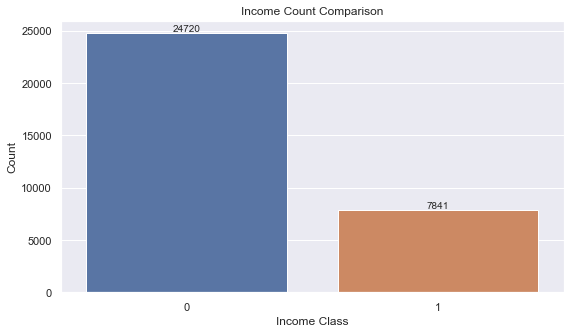

In [6]:
# Plot label
plt.figure(figsize=(9, 5))
plt.title('Income Count Comparison')
ax1 = sns.countplot(data=data_df, x='income', label='Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

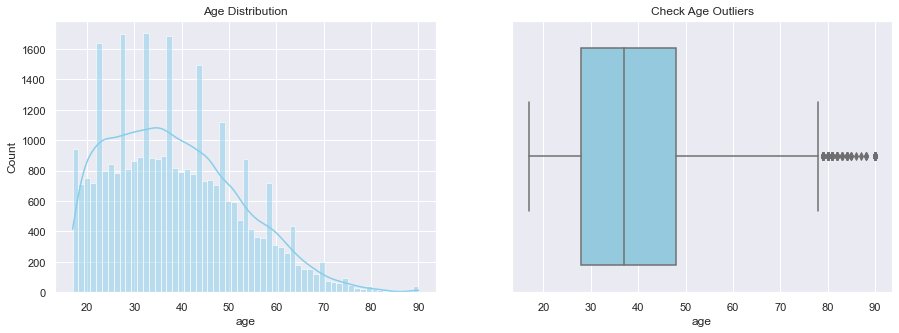

In [7]:
#age_skew = income_data['age'].skew()

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=data_df['age'], color='skyblue', kde=True, ax=ax1[0]).set(title= 'Age Distribution')
sns.boxplot(data=data_df, x='age', color='skyblue', ax=ax1[1]).set(title= 'Check Age Outliers')
plt.show()

In [145]:
# Check quarter of age
age_q1 = data_df['age'].quantile(0.25)
age_q2 = data_df['age'].quantile(0.50)
age_q3 = data_df['age'].quantile(0.75)
age_q4 = data_df['age'].quantile(1.00)
age_iqr = age_q3 - age_q1


print(f'Quartile 1 Age: {age_q1}')
print(f'Quartile 2 Age: {age_q2}')
print(f'Quartile 3 Age: {age_q3}')
print(f'Quartile 4 Age: {age_q4}')

Quartile 1 Age: 28.0
Quartile 2 Age: 37.0
Quartile 3 Age: 48.0
Quartile 4 Age: 90.0


In [146]:
lower_bound = age_q1 - 1.0 * age_iqr
upper_bound = age_q3 + 1.0 * age_iqr
# Remove outliers
data_df_v2 = data_df[(data_df['age'] >= lower_bound) & (data_df['age'] <= upper_bound)]

In [147]:
data_df_v2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
5,34,3.0,216864,11.0,9,0.0,7.0,4.0,4.0,0.0,0,3770,45,38.0,0
6,38,3.0,150601,0.0,6,5.0,0.0,4.0,4.0,1.0,0,3770,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


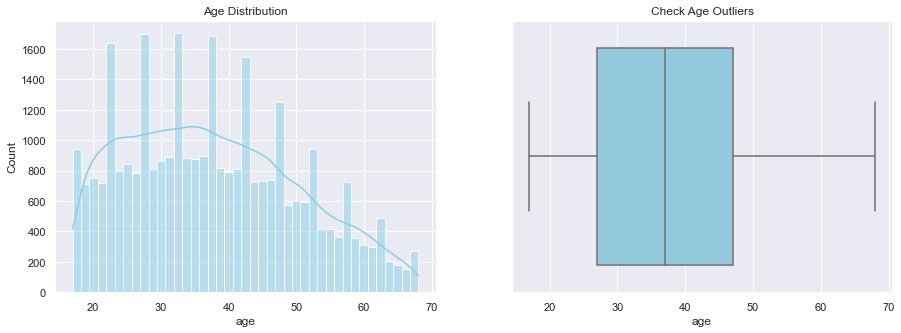

In [148]:
#age_skew = income_data['age'].skew()

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=data_df_v2['age'], color='skyblue', kde=True, ax=ax1[0]).set(title= 'Age Distribution')
sns.boxplot(data=data_df_v2, x='age', color='skyblue', ax=ax1[1]).set(title= 'Check Age Outliers')
plt.show()

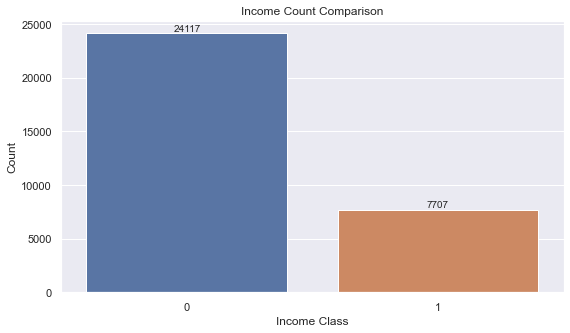

In [149]:
# Plot label
plt.figure(figsize=(9, 5))
plt.title('Income Count Comparison')
ax1 = sns.countplot(data=data_df_v2, x='income', label='Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

## Modeling Part

In [150]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score ,accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [151]:
class_names = ['<=50k', '>50k']

In [152]:
# Encode category data
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
categorical_data = data_df[categorical_columns]

encoder = OrdinalEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)

# Replace the original categorical columns with the encoded values
data_df[categorical_columns] = encoded_categorical_data

In [153]:
X = data_df.drop(columns= ['income', 'fnlwgt', 'education'])
Y = data_df['income']

# Split train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

# Sclaer data
scaler = StandardScaler()

# Fit and transform the training and testing data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [154]:
X2 = data_df_v2.drop(columns= ['income', 'fnlwgt', 'education'])
Y2 = data_df_v2['income']

# Split train test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=13)

# Sclaer data
scaler2 = StandardScaler()

# Fit and transform the training and testing data using the scaler
x_train_scaled2 = scaler2.fit_transform(x_train2)
x_test_scaled2 = scaler2.transform(x_test2)

x_train_scaled2 = pd.DataFrame(x_train_scaled2, columns= x_train.columns)
x_test_scaled2 = pd.DataFrame(x_test_scaled2, columns= x_test.columns)

In [155]:
# Define list for check usage
training_time = []
memory_train = []
testing_time = []
memory_test = []

### Random Forest

In [156]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
rf_base = RandomForestClassifier(n_estimators=300)
rf_model = rf_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = (et_train - st_train)
mem_train = (et_memTrain - st_memTrain)



In [157]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [158]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred1 = rf_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = (et_test - st_test)
mem_test = (et_memTest - st_memTest)

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_train)

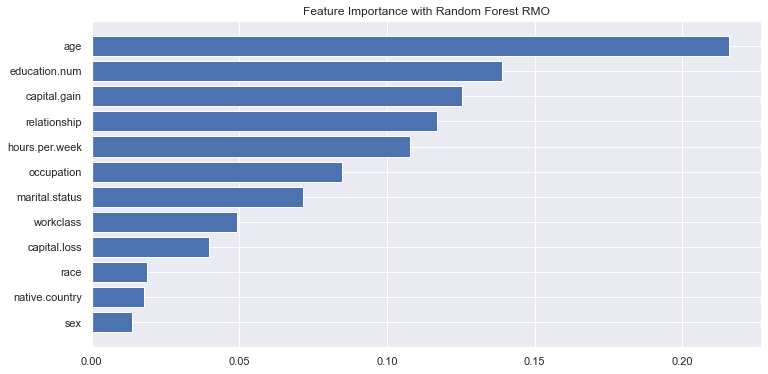

In [159]:
sorted_index = rf_model.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], rf_model.feature_importances_[sorted_index])
plt.title("Feature Importance with Random Forest RMO")
plt.show()

In [160]:
acc = accuracy_score(y_test2, y_pred1)
recall = recall_score(y_test2, y_pred1, average='weighted')
precision = precision_score(y_test2, y_pred1, average='weighted')
f1 = f1_score(y_test2, y_pred1, average='weighted')

In [161]:
print(f'RF Model RMO Accuracy: {acc*100:.4f}')
print(f'RF Model RMO Recall: {recall*100:.4f}')
print(f'RF Model RMO Precision: {precision*100:.4f}')
print(f'RF Model RMO F1-Score: {f1*100:.4f}')

RF Model RMO Accuracy: 85.3372
RF Model RMO Recall: 85.3372
RF Model RMO Precision: 84.7942
RF Model RMO F1-Score: 84.9421


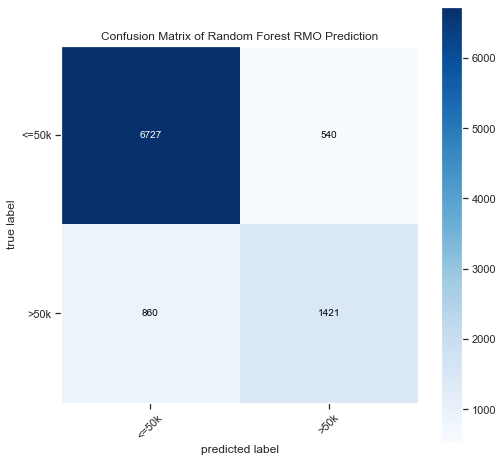

In [162]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred1)
fig3 , ax3 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of Random Forest RMO Prediction')
plt.show()

## LightGBM Model

In [163]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
lightGBM_base = LGBMClassifier(n_estimators=300, verbose=-1)
lgbm_model = lightGBM_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [164]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred2 = lgbm_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

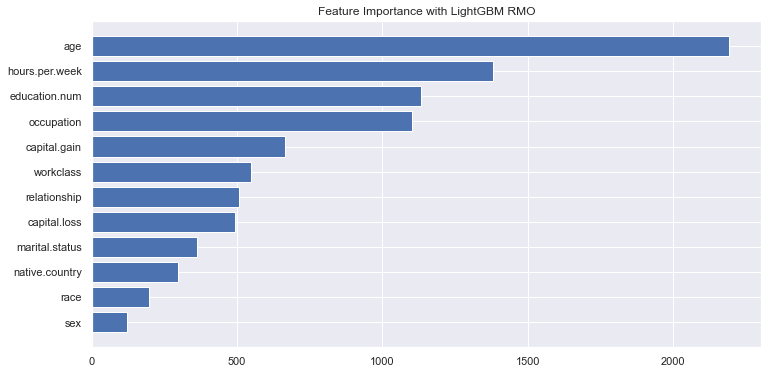

In [165]:
sorted_index = lgbm_model.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], lgbm_model.feature_importances_[sorted_index])
plt.title("Feature Importance with LightGBM RMO")
plt.show()

In [166]:
acc = accuracy_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2, average='weighted')
precision = precision_score(y_test2, y_pred2, average='weighted')
f1 = f1_score(y_test2, y_pred2, average='weighted')

In [167]:
print(f'LGBT Model RMO Accuracy: {acc*100:.4f}')
print(f'LGBT Model RMO Recall: {recall*100:.4f}')
print(f'LGBT Model RMO Precision: {precision*100:.4f}')
print(f'LGBT Model RMO F1-Score: {f1*100:.4f}')

LGBT Model RMO Accuracy: 87.0339
LGBT Model RMO Recall: 87.0339
LGBT Model RMO Precision: 86.5608
LGBT Model RMO F1-Score: 86.6201


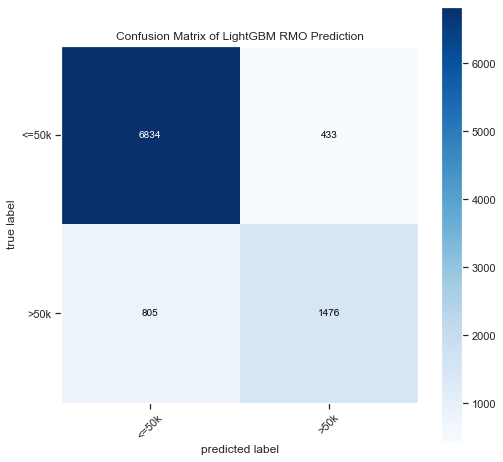

In [168]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred2)
fig3 , ax3 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of LightGBM RMO Prediction')
plt.show()

## SVM Model

In [169]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
svm_base = SVC()
svm_model = svm_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain


In [170]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [171]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred3 = svm_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [172]:
acc = accuracy_score(y_test2, y_pred3)
recall = recall_score(y_test2, y_pred3, average='weighted')
precision = precision_score(y_test2, y_pred3, average='weighted')
f1 = f1_score(y_test2, y_pred3, average='weighted')

In [173]:
print(f'SVM Model RMO Accuracy: {acc*100:.4f}')
print(f'SVM Model RMO Recall: {recall*100:.4f}')
print(f'SVM Model RMO Precision: {precision*100:.4f}')
print(f'SVM Model RMO F1-Score: {f1*100:.4f}')

SVM Model RMO Accuracy: 85.0545
SVM Model RMO Recall: 85.0545
SVM Model RMO Precision: 84.3385
SVM Model RMO F1-Score: 84.0741


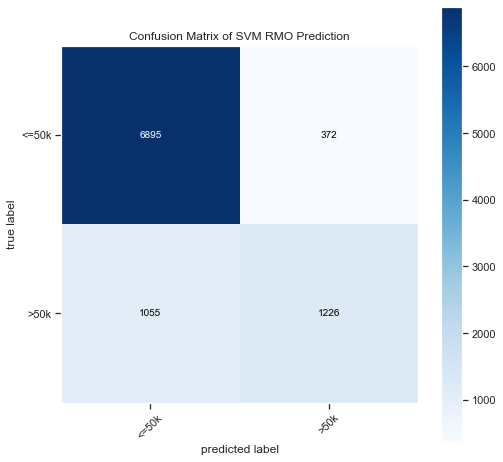

In [174]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred3)
fig4 , ax4 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of SVM RMO Prediction')
plt.show()

## MLP Model

In [175]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Build MLP model
mlp_base = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=400)
mlp_model = mlp_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain



In [176]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [177]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred4 = mlp_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [178]:
acc = accuracy_score(y_test2, y_pred4)
recall = recall_score(y_test2, y_pred4, average='weighted')
precision = precision_score(y_test2, y_pred4, average='weighted')
f1 = f1_score(y_test2, y_pred4, average='weighted')

In [179]:
print(f'MLP Model RMO Accuracy: {acc*100:.4f}')
print(f'MLP Model RMO Recall: {recall*100:.4f}')
print(f'MLP Model RMO Precision: {precision*100:.4f}')
print(f'MLP Model RMO F1-Score: {f1*100:.4f}')

MLP Model RMO Accuracy: 84.8240
MLP Model RMO Recall: 84.8240
MLP Model RMO Precision: 84.3486
MLP Model RMO F1-Score: 84.5138


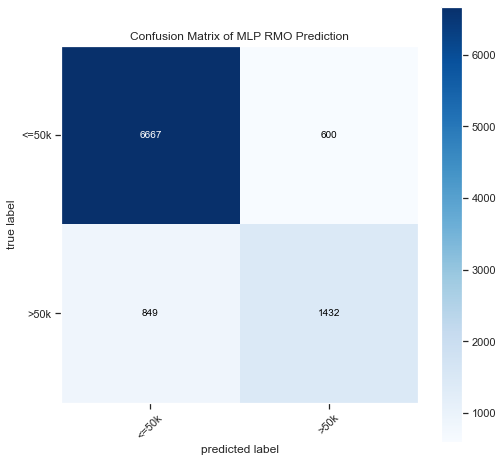

In [180]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred4)
fig5 , ax5 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of MLP RMO Prediction')
plt.show()

## LR Model

In [181]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Build model
lr_base = LogisticRegression()
lr_model = lr_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [182]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred5 = lr_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [183]:
acc = accuracy_score(y_test2, y_pred5)
recall = recall_score(y_test2, y_pred5, average='weighted')
precision = precision_score(y_test2, y_pred5, average='weighted')
f1 = f1_score(y_test2, y_pred5, average='weighted')

In [184]:
print(f'LR Model RMO Accuracy: {acc*100:.4f}')
print(f'LR Model RMO Recall: {recall*100:.4f}')
print(f'LR Model RMO Precision: {precision*100:.4f}')
print(f'LR Model RMO F1-Score: {f1*100:.4f}')

LR Model RMO Accuracy: 82.7189
LR Model RMO Recall: 82.7189
LR Model RMO Precision: 81.6092
LR Model RMO F1-Score: 81.1802


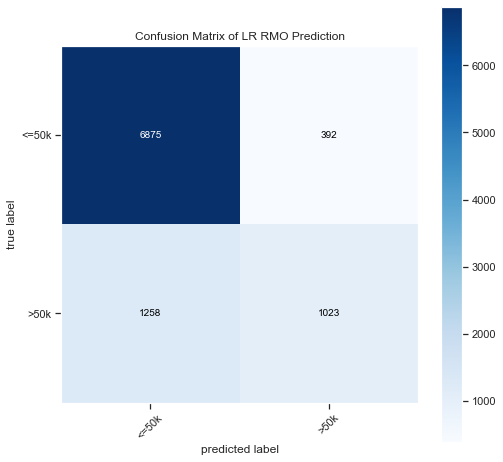

In [185]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred5)
fig6 , ax6 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of LR RMO Prediction')
plt.show()

## K-NN Model

In [186]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

knn_base = KNeighborsClassifier(n_neighbors = 7)
knn_model = knn_base.fit(x_train_scaled2, y_train2)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [187]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred6 = knn_model.predict(x_test_scaled2)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [188]:
acc = accuracy_score(y_test2, y_pred6)
recall = recall_score(y_test2, y_pred6, average='weighted')
precision = precision_score(y_test2, y_pred6, average='weighted')
f1 = f1_score(y_test2, y_pred6, average='weighted')

In [189]:
print(f'K-NN Model RMO Accuracy: {acc*100:.4f}')
print(f'K-NN Model RMO Recall: {recall*100:.4f}')
print(f'K-NN Model RMO Precision: {precision*100:.4f}')
print(f'K-NN Model RMO F1-Score: {f1*100:.4f}')

K-NN Model RMO Accuracy: 83.7767
K-NN Model RMO Recall: 83.7767
K-NN Model RMO Precision: 83.2237
K-NN Model RMO F1-Score: 83.4188


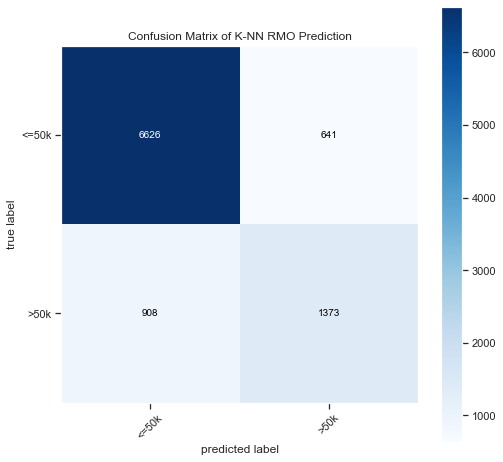

In [190]:
# Plot cm matrix
mat = confusion_matrix(y_test2, y_pred6)
fig7 , ax7 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of K-NN RMO Prediction')
plt.show()

In [191]:
for train_time, train_memory in zip(training_time, memory_train):
    print(f'Training Time: {train_time:.2f} seconds')
    print(f'Training Memory: {train_memory:.2f} MB')

Training Time: 7.15 seconds
Training Memory: -19.37 MB
Training Time: 0.40 seconds
Training Memory: 12.12 MB
Training Time: 16.17 seconds
Training Memory: -22.37 MB
Training Time: 32.39 seconds
Training Memory: 1.61 MB
Training Time: 0.04 seconds
Training Memory: 2.57 MB
Training Time: 0.11 seconds
Training Memory: -1.99 MB


In [192]:
for test_time, test_memory in zip(testing_time, memory_test):
    print(f'Testing Time: {test_time:.2f} seconds')
    print(f'Testing Memory: {test_memory:.2f} MB')

Testing Time: 0.84 seconds
Testing Memory: -19.37 MB
Testing Time: 0.08 seconds
Testing Memory: 0.87 MB
Testing Time: 11.97 seconds
Testing Memory: 1.40 MB
Testing Time: 0.01 seconds
Testing Memory: 0.00 MB
Testing Time: 0.00 seconds
Testing Memory: 0.00 MB
Testing Time: 4.22 seconds
Testing Memory: 0.91 MB


In [193]:
import joblib
# Dump modelto pkl file
joblib.dump(rf_model, 'rmo_rf.pkl')
joblib.dump(lgbm_model, 'rmo_lgbm.pkl')
joblib.dump(svm_model, 'rmo_svm.pkl')
joblib.dump(mlp_model, 'rmo_mlp.pkl')
joblib.dump(lr_model, 'rmo_lr.pkl')
joblib.dump(knn_model, 'rmo_knn.pkl')

['rmo_knn.pkl']

## Oversampling Part

In [194]:
import joblib
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE

In [195]:
path_save = r'C:\Users\ASUS\Desktop\Learning\masterDegree\thirdSemester\sdForDataScience\project\Milestone2\Milestone2_materials\model\over'

In [196]:
def train_oversampling(input_model, model_name, oversamplers, path_save):
    # Define the model
    base_model = input_model
    # Apply and evaluate each oversampler
    for oversampler_name, oversampler in oversamplers:
        X_resampled, y_resampled = oversampler.fit_resample(x_train2, y_train2)

        tmp_scaler = StandardScaler()
        x_train_resampled_scaled = scaler.fit_transform(X_resampled)
        x_test_resampled_scaled = scaler.transform(x_test2)

        # Train the model with the resampled data
        trained_model = base_model.fit(x_train_resampled_scaled, y_resampled)

        # Make predictions on the test data
        y_pred = trained_model.predict(x_test_resampled_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test2, y_pred)
        precision = precision_score(y_test2, y_pred, average='weighted')
        recall = recall_score(y_test2, y_pred, average='weighted')
        f1 = f1_score(y_test2, y_pred, average='weighted')
        # Confusion natric
        mat = confusion_matrix(y_test2, y_pred)
        TN = mat[0][0]
        FN = mat[1][0]
        TP = mat[1][1]
        FP = mat[0][1]
        
        file_name = f'\{model_name}_{oversampler_name}.pkl'
        print(f"Oversampler: {oversampler_name}, Model: {model_name}")
        print(f'Accuracy: {accuracy*100:.4f}')
        print(f'Recall: {recall*100:.4f}')
        print(f'Precision: {precision*100:.4f}')
        print(f'F1-Score: {f1*100:.4f}')
        print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
        print(f'Saving: {file_name}')
        joblib.dump(trained_model, path_save+file_name)
        # Plot cm matrix
        fig , ax = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
        disp = plt.title(f'Confusion Matrix of {model_name} {oversampler_name} Prediction')
        plt.show()

In [197]:
oversamplers = [
    ('SMOTE', SMOTE(random_state=13)),
    ('RandomOver-sampler', RandomOverSampler(random_state=13)),
    ('ADASYN', ADASYN(random_state=13)),
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=13))
]

## Random Forest Over

Oversampler: SMOTE, Model: RF Model
Accuracy: 84.1852
Recall: 84.1852
Precision: 84.5439
F1-Score: 84.3437
TP: 1596, FP: 825, TN: 6442, FN: 685
Saving: \RF Model_SMOTE.pkl


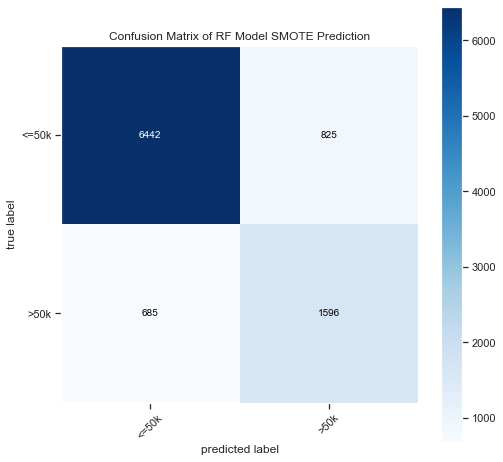

Oversampler: RandomOver-sampler, Model: RF Model
Accuracy: 83.9757
Recall: 83.9757
Precision: 84.2619
F1-Score: 84.1055
TP: 1572, FP: 821, TN: 6446, FN: 709
Saving: \RF Model_RandomOver-sampler.pkl


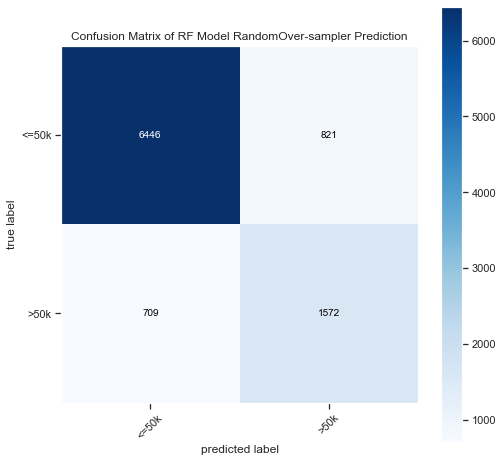

Oversampler: ADASYN, Model: RF Model
Accuracy: 83.8919
Recall: 83.8919
Precision: 84.3010
F1-Score: 84.0708
TP: 1590, FP: 847, TN: 6420, FN: 691
Saving: \RF Model_ADASYN.pkl


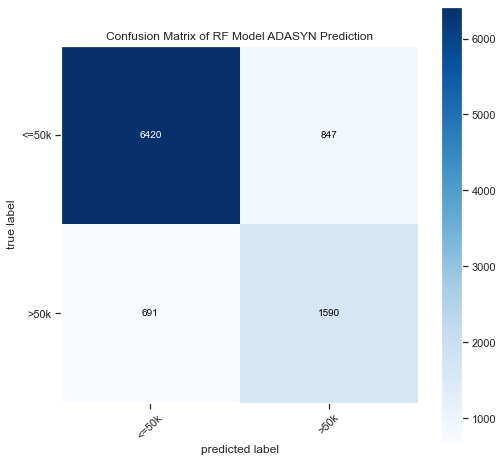

Oversampler: BorderlineSMOTE, Model: RF Model
Accuracy: 83.9233
Recall: 83.9233
Precision: 84.3742
F1-Score: 84.1181
TP: 1599, FP: 853, TN: 6414, FN: 682
Saving: \RF Model_BorderlineSMOTE.pkl


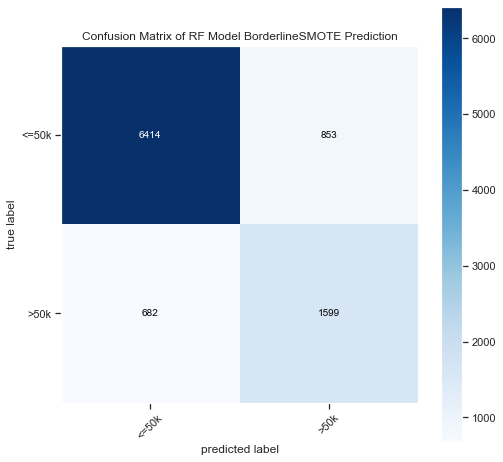

In [198]:
# Base model
model_name = 'RF Model'
rf_base = RandomForestClassifier(n_estimators=300)
train_oversampling(rf_base, model_name, oversamplers, path_save)

## LightGBM Model Over

Oversampler: SMOTE, Model: LightGBM
Accuracy: 85.7876
Recall: 85.7876
Precision: 86.3587
F1-Score: 86.0153
TP: 1718, FP: 794, TN: 6473, FN: 563
Saving: \LightGBM_SMOTE.pkl


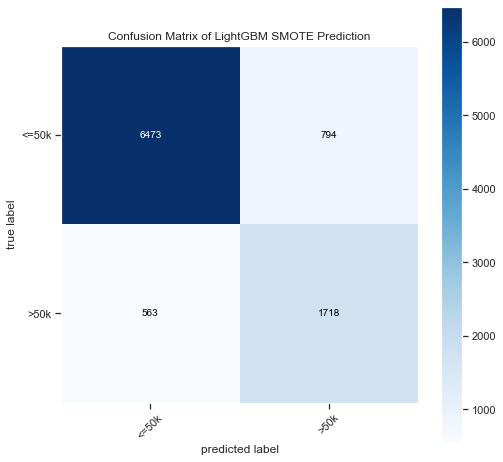

Oversampler: RandomOver-sampler, Model: LightGBM
Accuracy: 84.3004
Recall: 84.3004
Precision: 86.7840
F1-Score: 84.9849
TP: 1909, FP: 1127, TN: 6140, FN: 372
Saving: \LightGBM_RandomOver-sampler.pkl


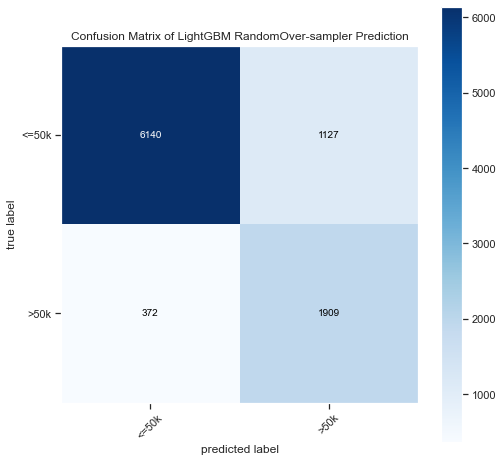

Oversampler: ADASYN, Model: LightGBM
Accuracy: 85.0021
Recall: 85.0021
Precision: 85.9631
F1-Score: 85.3531
TP: 1741, FP: 892, TN: 6375, FN: 540
Saving: \LightGBM_ADASYN.pkl


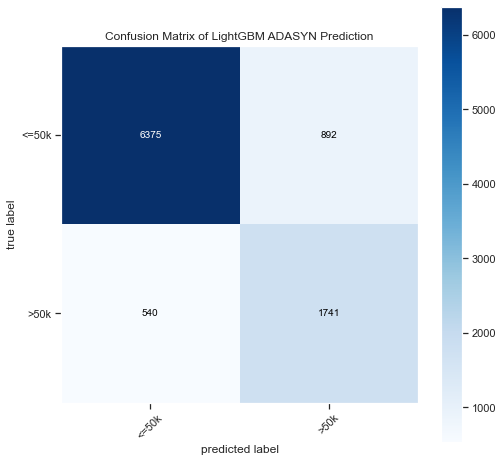

Oversampler: BorderlineSMOTE, Model: LightGBM
Accuracy: 84.6774
Recall: 84.6774
Precision: 85.8054
F1-Score: 85.0773
TP: 1749, FP: 931, TN: 6336, FN: 532
Saving: \LightGBM_BorderlineSMOTE.pkl


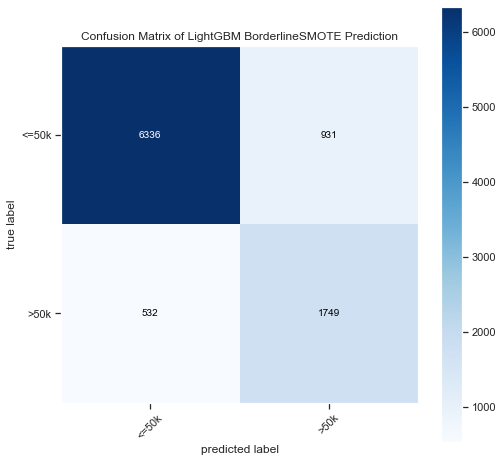

In [199]:
# Base model
model_name = 'LightGBM'
lightGBM_base = LGBMClassifier(n_estimators=300, verbose=-1)
train_oversampling(lightGBM_base, model_name, oversamplers, path_save)

## SVM Model Over

Oversampler: SMOTE, Model: SVM
Accuracy: 79.4407
Recall: 79.4407
Precision: 84.7325
F1-Score: 80.6955
TP: 1935, FP: 1617, TN: 5650, FN: 346
Saving: \SVM_SMOTE.pkl


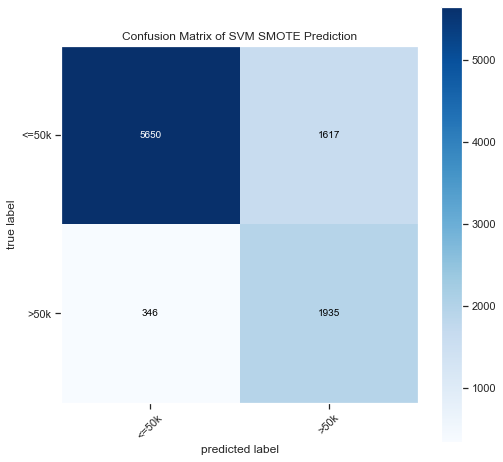

Oversampler: RandomOver-sampler, Model: SVM
Accuracy: 79.3255
Recall: 79.3255
Precision: 85.2725
F1-Score: 80.6464
TP: 1989, FP: 1682, TN: 5585, FN: 292
Saving: \SVM_RandomOver-sampler.pkl


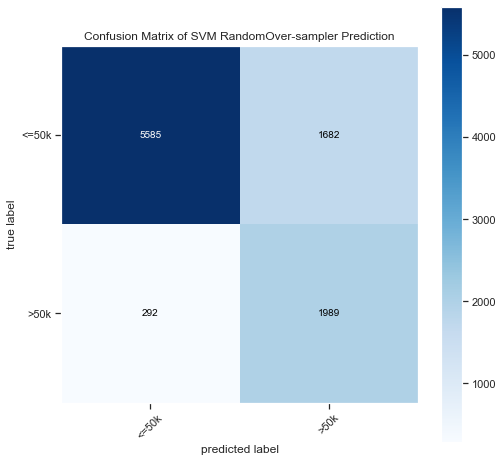

Oversampler: ADASYN, Model: SVM
Accuracy: 76.3720
Recall: 76.3720
Precision: 84.5020
F1-Score: 78.0234
TP: 2017, FP: 1992, TN: 5275, FN: 264
Saving: \SVM_ADASYN.pkl


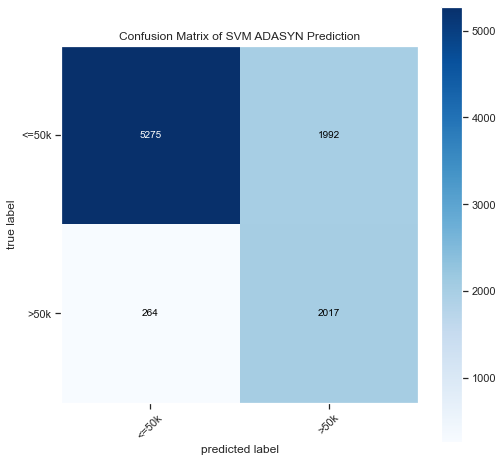

Oversampler: BorderlineSMOTE, Model: SVM
Accuracy: 76.5815
Recall: 76.5815
Precision: 84.5015
F1-Score: 78.2080
TP: 2011, FP: 1966, TN: 5301, FN: 270
Saving: \SVM_BorderlineSMOTE.pkl


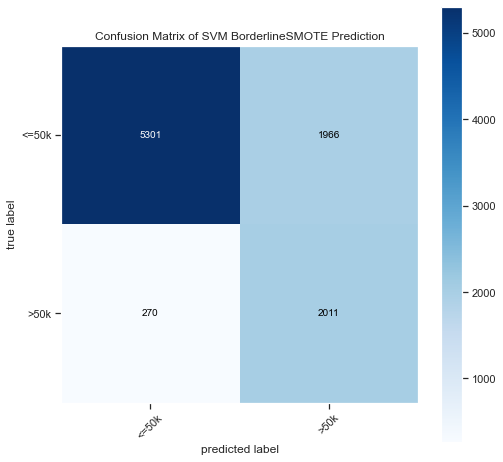

In [200]:
# Training model
model_name = 'SVM'
svm_base = SVC()
train_oversampling(svm_base, model_name, oversamplers, path_save)

## MLP Model Over

Oversampler: SMOTE, Model: MLP
Accuracy: 80.2053
Recall: 80.2053
Precision: 84.4724
F1-Score: 81.3066
TP: 1877, FP: 1486, TN: 5781, FN: 404
Saving: \MLP_SMOTE.pkl


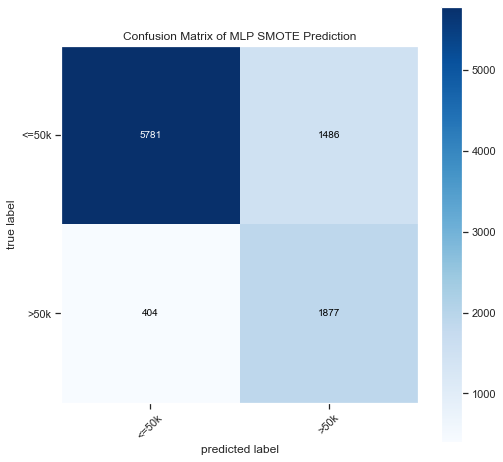

Oversampler: RandomOver-sampler, Model: MLP
Accuracy: 79.7863
Recall: 79.7863
Precision: 84.6393
F1-Score: 80.9771
TP: 1912, FP: 1561, TN: 5706, FN: 369
Saving: \MLP_RandomOver-sampler.pkl


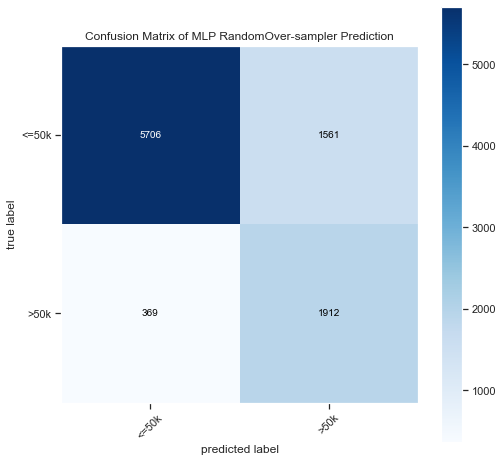

Oversampler: ADASYN, Model: MLP
Accuracy: 80.6137
Recall: 80.6137
Precision: 83.7190
F1-Score: 81.5272
TP: 1776, FP: 1346, TN: 5921, FN: 505
Saving: \MLP_ADASYN.pkl


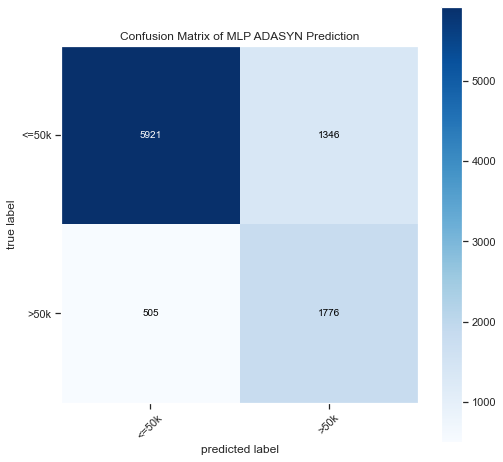

Oversampler: BorderlineSMOTE, Model: MLP
Accuracy: 79.1894
Recall: 79.1894
Precision: 83.7956
F1-Score: 80.3810
TP: 1855, FP: 1561, TN: 5706, FN: 426
Saving: \MLP_BorderlineSMOTE.pkl


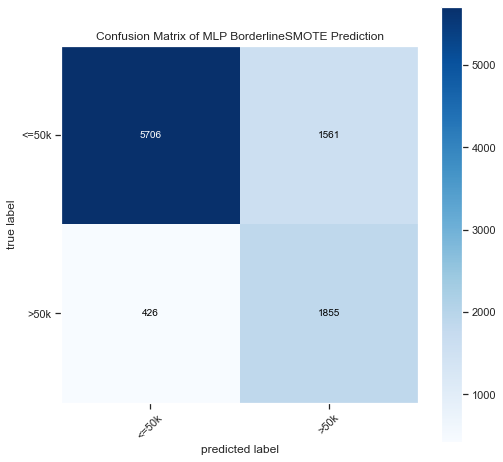

In [201]:
# Build MLP model
model_name = 'MLP'
mlp_base = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=400)
train_oversampling(mlp_base, model_name, oversamplers, path_save)

## LR Model

Oversampler: SMOTE, Model: LR
Accuracy: 77.5765
Recall: 77.5765
Precision: 82.3115
F1-Score: 78.8618
TP: 1779, FP: 1639, TN: 5628, FN: 502
Saving: \LR_SMOTE.pkl


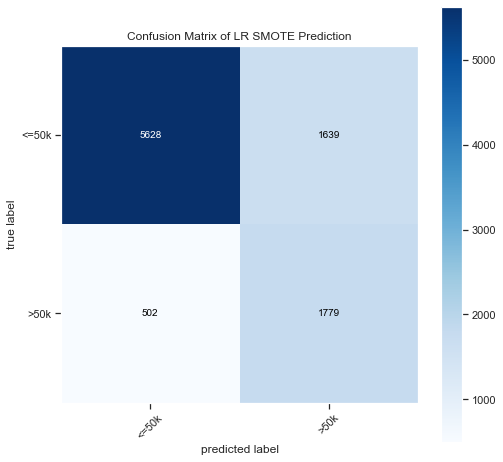

Oversampler: RandomOver-sampler, Model: LR
Accuracy: 77.9849
Recall: 77.9849
Precision: 82.2967
F1-Score: 79.1930
TP: 1759, FP: 1580, TN: 5687, FN: 522
Saving: \LR_RandomOver-sampler.pkl


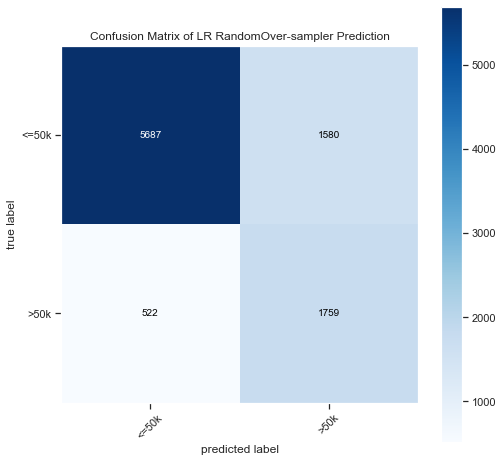

Oversampler: ADASYN, Model: LR
Accuracy: 73.4290
Recall: 73.4290
Precision: 82.0581
F1-Score: 75.3040
TP: 1903, FP: 2159, TN: 5108, FN: 378
Saving: \LR_ADASYN.pkl


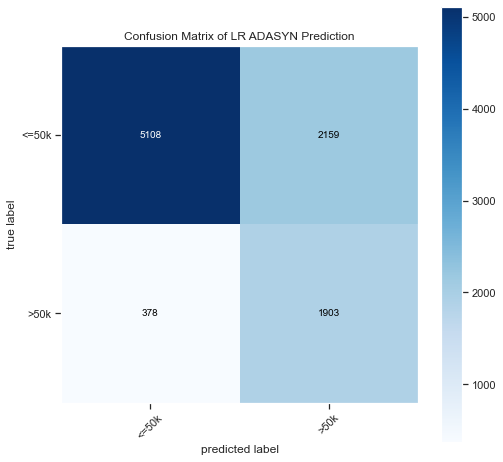

Oversampler: BorderlineSMOTE, Model: LR
Accuracy: 72.8530
Recall: 72.8530
Precision: 81.9683
F1-Score: 74.7906
TP: 1912, FP: 2223, TN: 5044, FN: 369
Saving: \LR_BorderlineSMOTE.pkl


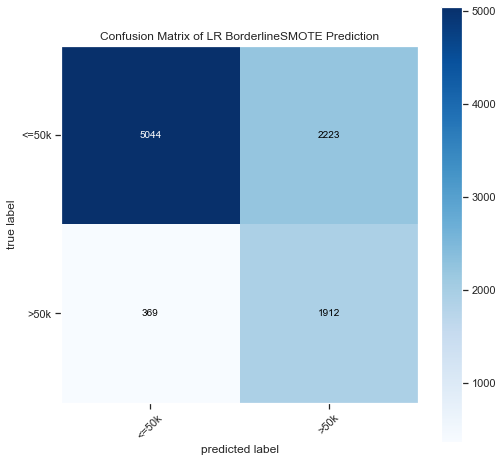

In [202]:
# Build model
model_name = 'LR'
lr_base = LogisticRegression()
train_oversampling(lr_base, model_name, oversamplers, path_save)

## K-NN Model

Oversampler: SMOTE, Model: K-NN
Accuracy: 80.3729
Recall: 80.3729
Precision: 83.0612
F1-Score: 81.2178
TP: 1715, FP: 1308, TN: 5959, FN: 566
Saving: \K-NN_SMOTE.pkl


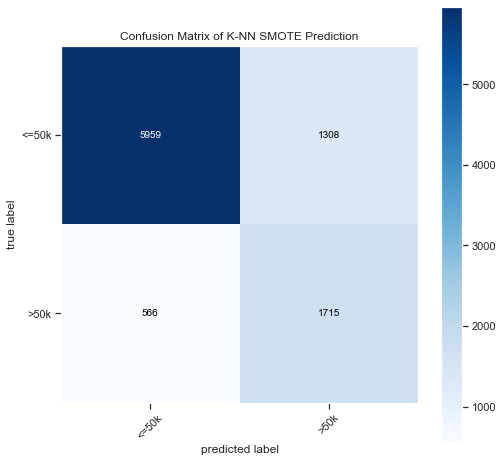

Oversampler: RandomOver-sampler, Model: K-NN
Accuracy: 78.1630
Recall: 78.1630
Precision: 82.4470
F1-Score: 79.3591
TP: 1766, FP: 1570, TN: 5697, FN: 515
Saving: \K-NN_RandomOver-sampler.pkl


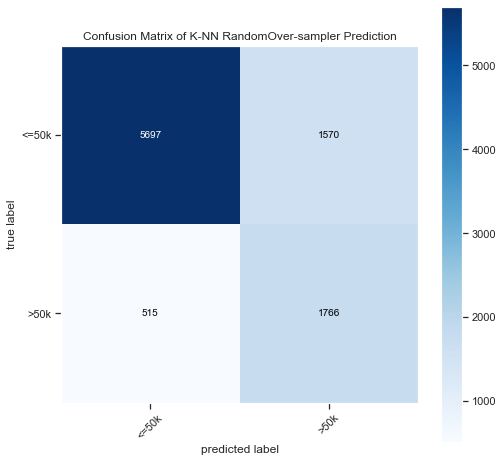

Oversampler: ADASYN, Model: K-NN
Accuracy: 78.3724
Recall: 78.3724
Precision: 82.7001
F1-Score: 79.5654
TP: 1782, FP: 1566, TN: 5701, FN: 499
Saving: \K-NN_ADASYN.pkl


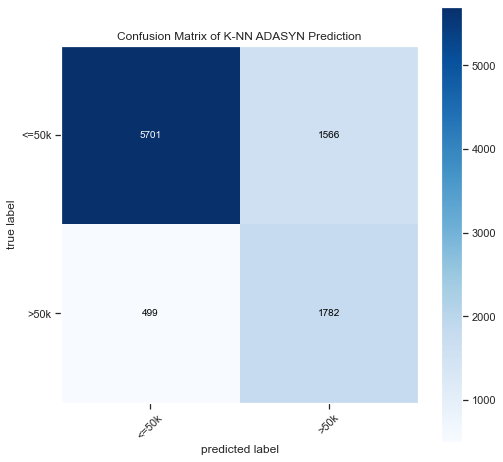

Oversampler: BorderlineSMOTE, Model: K-NN
Accuracy: 78.8856
Recall: 78.8856
Precision: 82.6506
F1-Score: 79.9729
TP: 1752, FP: 1487, TN: 5780, FN: 529
Saving: \K-NN_BorderlineSMOTE.pkl


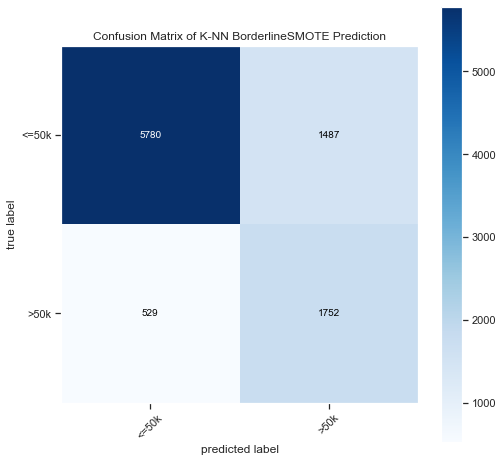

In [203]:
# Build model
model_name = 'K-NN'
knn_base = KNeighborsClassifier(n_neighbors = 7)
train_oversampling(knn_base, model_name, oversamplers, path_save)